In [46]:
import pandas as pd
import numpy as np
cookies = pd.read_csv('Data/cookies.csv')
print(cookies.head(1))

   page_id                   start_url                    final_url  \
0        1  http://www.poptropica.com/  https://www.poptropica.com/   

     cookie_domain cookie_name              cookie_value  
0  .poptropica.com      Apache  1603926188.669.375982528  


In [3]:
# Data info
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 6 columns):
page_id          5500 non-null int64
start_url        5500 non-null object
final_url        5500 non-null object
cookie_domain    5500 non-null object
cookie_name      5500 non-null object
cookie_value     5366 non-null object
dtypes: int64(1), object(5)
memory usage: 257.9+ KB


In [30]:
# Domain names
# Attempting to parse only domain names not url
domain_names = cookies['cookie_domain'].str.lstrip('.www.')
domain_names = domain_names.str.split('.', expand=True)[[0]]
#split('.', expand=True)[[1]]
print(domain_names)

                   0
0         poptropica
1         poptropica
2         poptropica
3         poptropica
4         poptropica
5         poptropica
6         poptropica
7        doubleclick
8         poptropica
9         poptropica
10        poptropica
11        poptropica
12        poptropica
13        poptropica
14        poptropica
15        poptropica
16       doubleclick
17        poptropica
18        poptropica
19        poptropica
20        poptropica
21        poptropica
22        poptropica
23        poptropica
24       doubleclick
25        poptropica
26            google
27            google
28            google
29            google
...              ...
5470      mattel-app
5471      mattel-app
5472          mattel
5473          mattel
5474          mattel
5475          mattel
5476          mattel
5477          barbie
5478          mattel
5479          mattel
5480          mattel
5481             2o7
5482          mattel
5483          mattel
5484            krxd
5485         

In [25]:
# Start domain
# Attempting to parse starting domain
#start_domains = reqs['start_url'].str.split('.', expand=True)[[1]]
start_domains = cookies['start_url'].str.split('/', expand=True)[2].str.split('.', expand=True)[1]
print(start_domains)

0       poptropica
1       poptropica
2       poptropica
3       poptropica
4       poptropica
5       poptropica
6       poptropica
7       poptropica
8       poptropica
9       poptropica
10      poptropica
11      poptropica
12      poptropica
13      poptropica
14      poptropica
15      poptropica
16      poptropica
17      poptropica
18      poptropica
19      poptropica
20      poptropica
21      poptropica
22      poptropica
23      poptropica
24      poptropica
25      poptropica
26          google
27          google
28          google
29          google
           ...    
5470        mattel
5471        mattel
5472        mattel
5473        mattel
5474        mattel
5475        mattel
5476        mattel
5477        mattel
5478        mattel
5479        mattel
5480        mattel
5481        mattel
5482        mattel
5483        mattel
5484        mattel
5485        mattel
5486        mattel
5487        mattel
5488        mattel
5489        mattel
5490        mattel
5491        

In [32]:
cookies['from'] = start_domains
cookies['to'] = domain_names

In [33]:
cookies['third_party'] = cookies['from'] != cookies['to']

In [34]:
simple_data = cookies[['page_id','from', 'to', 'third_party']]

In [35]:
simple_data[simple_data['third_party'] == True]

,page_id,from,to,third_party
7,1,poptropica,doubleclick,True
16,2,poptropica,doubleclick,True
24,3,poptropica,doubleclick,True
42,11,awesomelibrary,doubleclick,True
43,11,awesomelibrary,doubleclick,True
45,14,awesomelibrary,doubleclick,True
46,14,awesomelibrary,doubleclick,True
47,14,awesomelibrary,agkn,True
48,14,awesomelibrary,agkn,True
50,14,awesomelibrary,openx,True


In [64]:
#number of cookies on each start domain
num_cookies = simple_data["from"].value_counts()

coolmathgames               866
hellokids                   458
cprewritten                 416
com                         361
net                         246
crayola                     230
sony                        219
xbox                        216
org                         207
amazon                      198
spotify                     191
nintendo                    162
mattel                      154
cbc                         153
surfnetkids                 136
coloring-book               106
4kids                        96
discoveryeducation           90
linkedin                     84
mocomi                       65
childrensmuseumofphoenix     57
coloring4all                 44
netflix                      44
barbie                       43
factmonster                  36
si                           35
education                    33
awesomelibrary               31
astorybeforebed              27
poptropica                   26
                           ... 
hippowor

In [65]:
#number of third party cookies on each start domain
num_third_cookies = simple_data[simple_data['third_party'] == True]["from"].value_counts()

coolmathgames               840
hellokids                   396
cprewritten                 389
com                         361
net                         246
org                         207
amazon                      177
xbox                        156
crayola                     140
spotify                     122
sony                        121
surfnetkids                 117
coloring-book                88
mattel                       80
4kids                        72
cbc                          68
discoveryeducation           64
nintendo                     61
mocomi                       58
childrensmuseumofphoenix     53
linkedin                     39
coloring4all                 33
barbie                       28
si                           28
awesomelibrary               28
cbeebies                     22
netflix                      19
factmonster                  18
disneyjunior                 18
americanhistory              16
mit                          16
kids    

In [62]:
#how many cookies from each third party show up in dataset
third_party_count = simple_data[simple_data['third_party'] == True]["to"].value_counts()

pubmatic             327
casalemedia          163
addthis              142
go                   131
doubleclick          122
ads                   92
yahoo                 82
crwdcntrl             78
rubiconproject        78
id5-sync              75
tapad                 75
adsrvr                74
bluekai               62
smartadserver         61
pippio                60
rlcdn                 58
shop                  57
intentiq              56
openx                 52
scorecardresearch     52
exelator              51
youtube               48
amazon-adsystem       48
bidswitch             48
rfihub                47
demdex                47
quantserve            46
mookie1               42
agkn                  41
disneynow             36
                    ... 
infolinks              2
skimresources          2
aorta                  2
mgid                   2
cquotient              2
nrich                  2
yieldlab               2
altitude-arena         2
criteo                 2


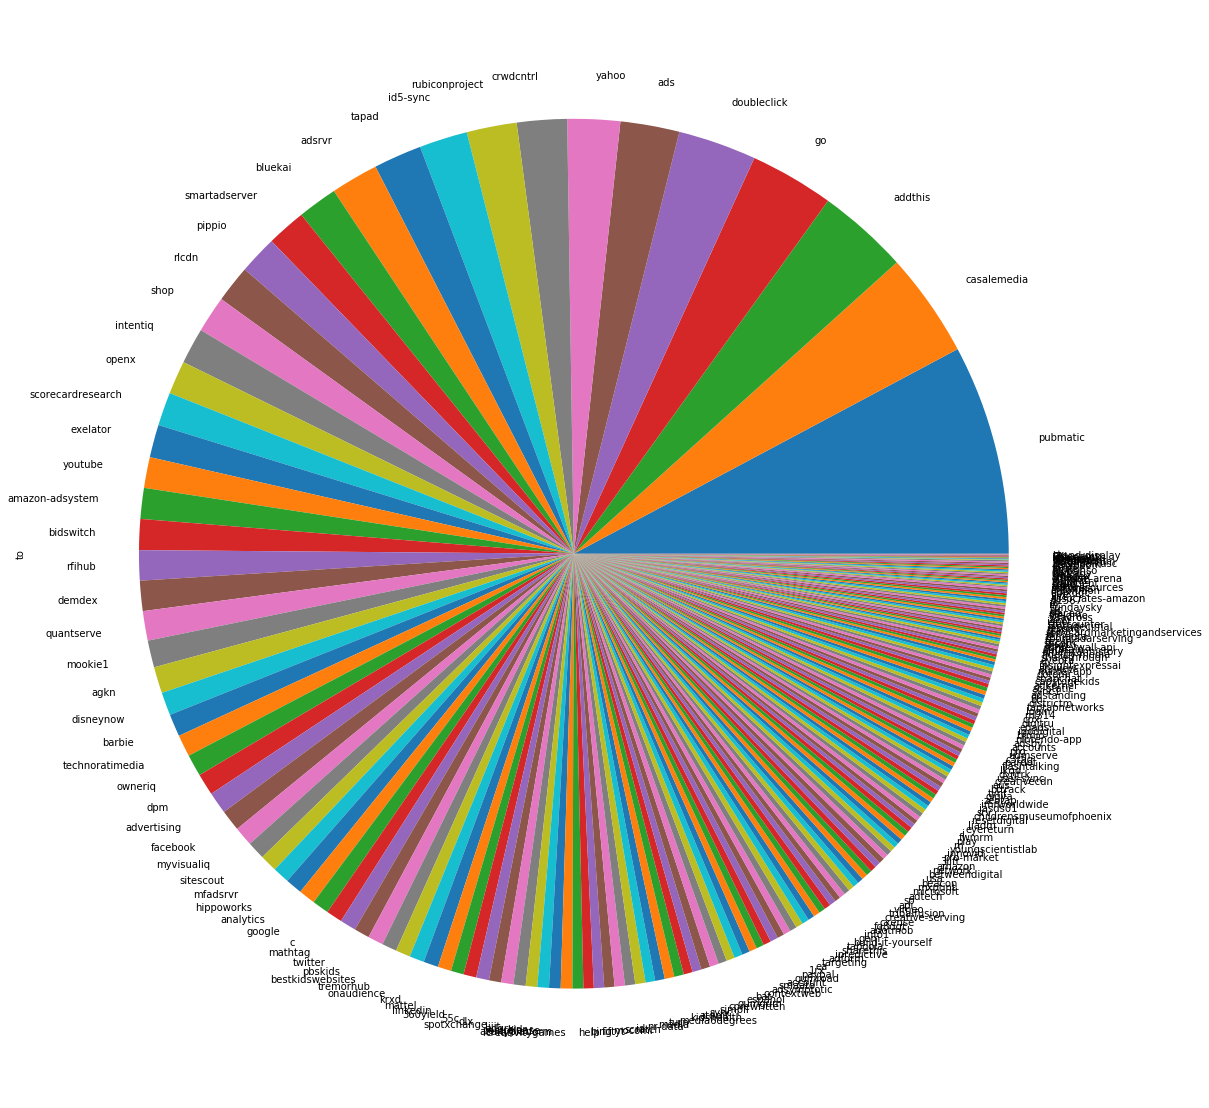

In [37]:
# Plotting pie chart
# Not very useful for large data
third_party_count.plot.pie(figsize=(20, 20))

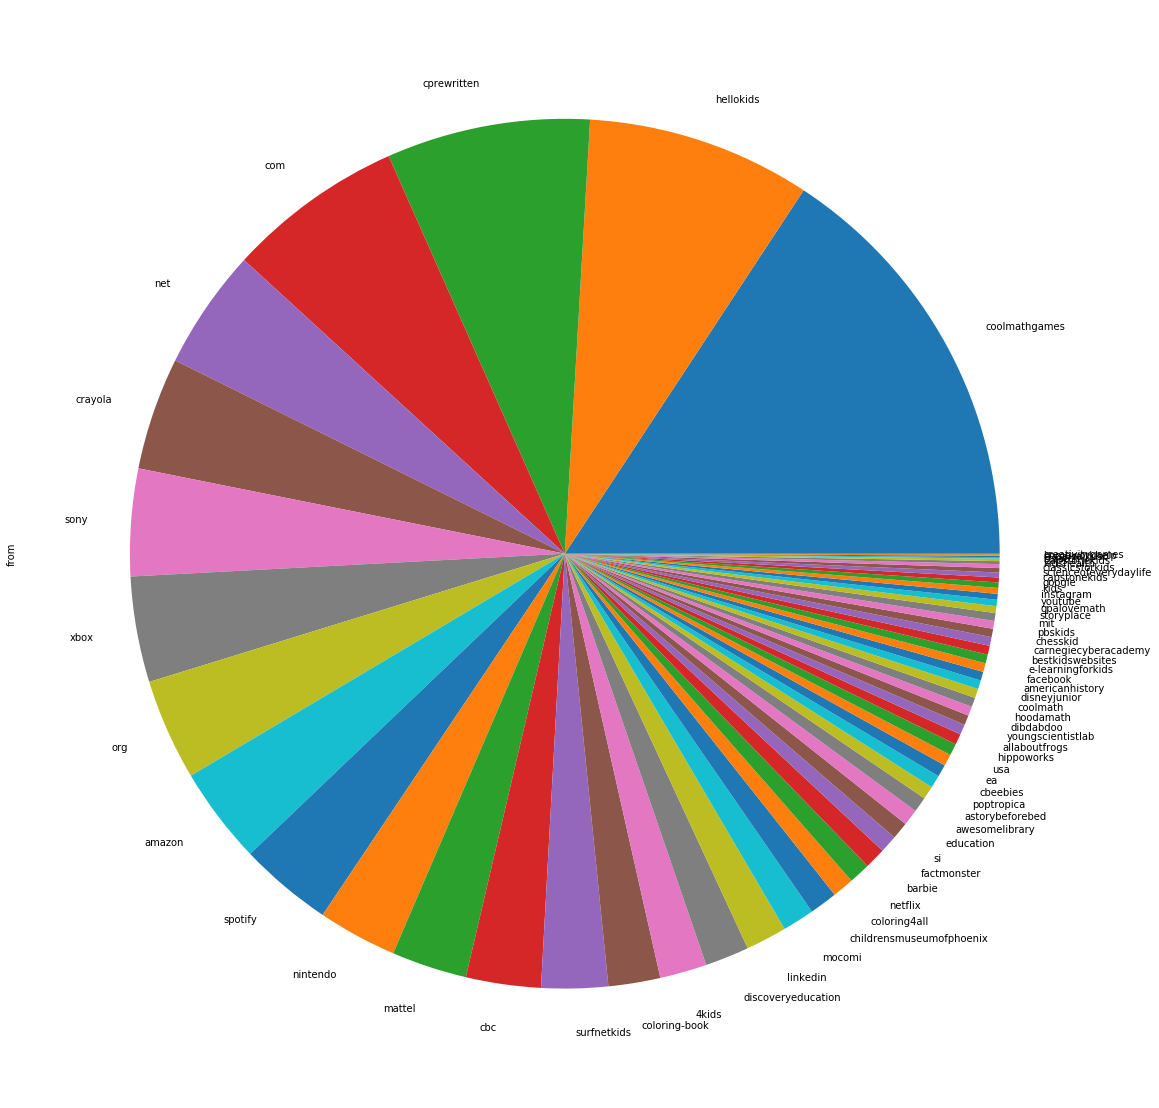

In [69]:
# histogram of num_cookies
num_cookies.plot.pie(figsize=(20, 20))

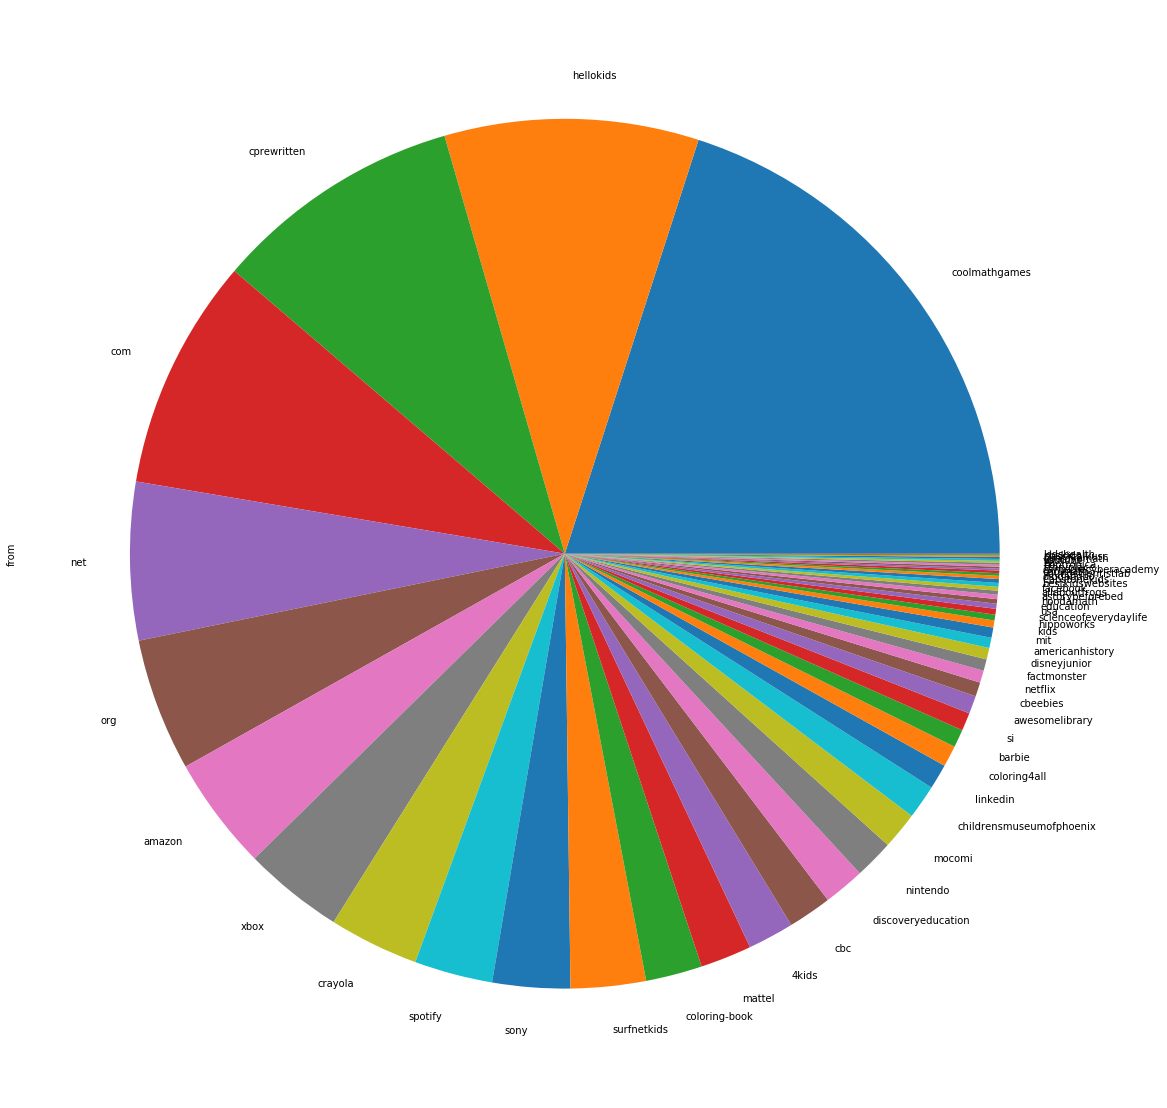

In [71]:
# pie of num_third_cookies
num_third_cookies.plot.pie(figsize=(20, 20))

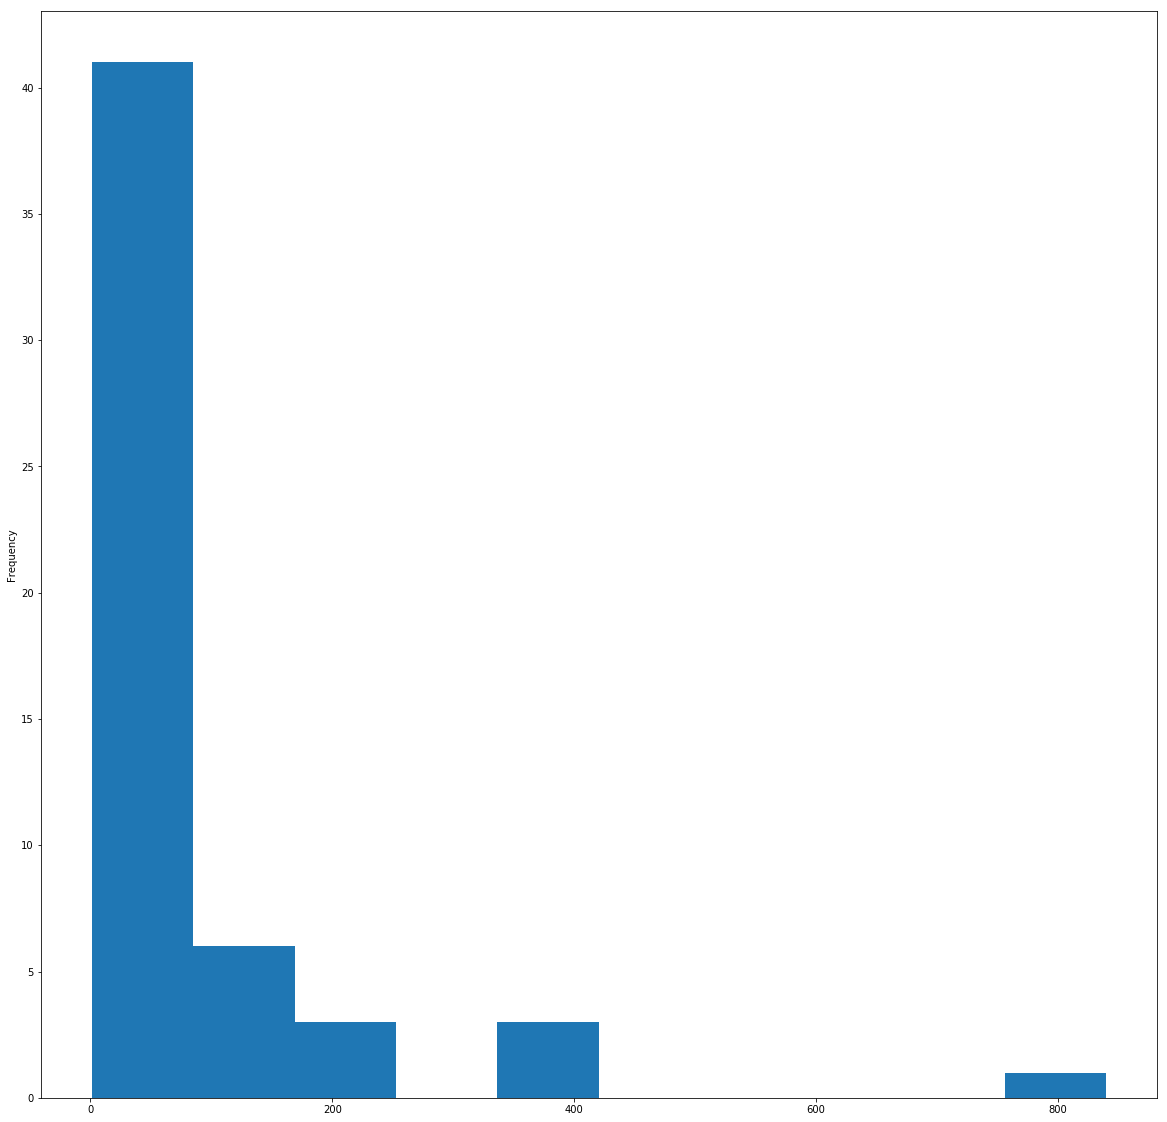

In [73]:
#third party over total cookies per start domain
cookies_third = num_third_cookies/ num_cookies
# print(cookies_third)
num_third_cookies.plot.hist(figsize=(20, 20))